In [3]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import random

In [4]:
df = pd.read_csv("data/fakenews.csv")
df

,title,Target
0,Trump Will ANNHILILATE The Working Class He’s...,Fake
1,Yemen Houthis say have shot down U.S. surveill...,True
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,Fake
3,U.S. Commerce Secretary wants NAFTA autos cont...,True
4,U.S. warns of repercussions for Pakistan over ...,True
...,...,...
44893,Germany’s Angela Merkel Makes Incredibly Naive...,Fake
44894,MEDIA IGNORES! HOUSE DEM IT SUSPECTS Wanted Un...,Fake
44895,Obama administration completes rule to curb me...,True
44896,Meeting between Egyptian foreign minister and ...,True


In [5]:
size = len(df)
size

44898

In [6]:
counts = df["Target"].value_counts()
counts

Fake    23461
True    21437
Name: Target, dtype: int64

<AxesSubplot: >

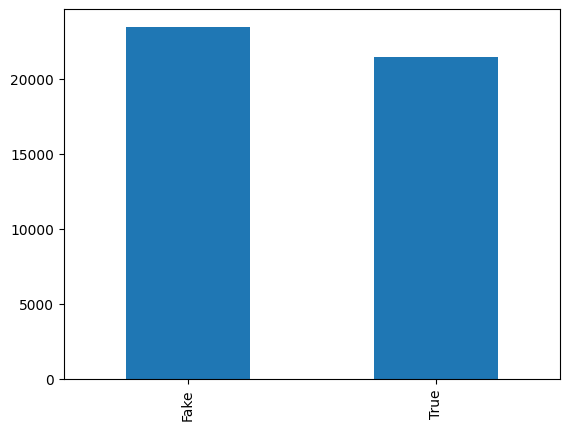

In [7]:
counts.plot(kind = 'bar')

In [8]:
nltk.word_tokenize(df['title'][2])

['BREAKING',
 'NEWS',
 ':',
 'TRUMP',
 'ADMIN',
 'ANNOUNCES',
 '“',
 'MASSIVE',
 'TAX',
 'CUT',
 '”',
 'For',
 'Businesses',
 'And',
 'Massive',
 'Tax',
 'Reform',
 '[',
 'VIDEO',
 ']']

In [9]:
df['tokens'] = df['title'].apply(nltk.word_tokenize)
df

,title,Target,tokens
0,Trump Will ANNHILILATE The Working Class He’s...,Fake,"[Trump, Will, ANNHILILATE, The, Working, Class..."
1,Yemen Houthis say have shot down U.S. surveill...,True,"[Yemen, Houthis, say, have, shot, down, U.S., ..."
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,Fake,"[BREAKING, NEWS, :, TRUMP, ADMIN, ANNOUNCES, “..."
3,U.S. Commerce Secretary wants NAFTA autos cont...,True,"[U.S., Commerce, Secretary, wants, NAFTA, auto..."
4,U.S. warns of repercussions for Pakistan over ...,True,"[U.S., warns, of, repercussions, for, Pakistan..."
...,...,...,...
44893,Germany’s Angela Merkel Makes Incredibly Naive...,Fake,"[Germany, ’, s, Angela, Merkel, Makes, Incredi..."
44894,MEDIA IGNORES! HOUSE DEM IT SUSPECTS Wanted Un...,Fake,"[MEDIA, IGNORES, !, HOUSE, DEM, IT, SUSPECTS, ..."
44895,Obama administration completes rule to curb me...,True,"[Obama, administration, completes, rule, to, c..."
44896,Meeting between Egyptian foreign minister and ...,True,"[Meeting, between, Egyptian, foreign, minister..."


In [10]:
df['length'] = df['tokens'].apply(len)
df

,title,Target,tokens,length
0,Trump Will ANNHILILATE The Working Class He’s...,Fake,"[Trump, Will, ANNHILILATE, The, Working, Class...",19
1,Yemen Houthis say have shot down U.S. surveill...,True,"[Yemen, Houthis, say, have, shot, down, U.S., ...",13
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,Fake,"[BREAKING, NEWS, :, TRUMP, ADMIN, ANNOUNCES, “...",20
3,U.S. Commerce Secretary wants NAFTA autos cont...,True,"[U.S., Commerce, Secretary, wants, NAFTA, auto...",13
4,U.S. warns of repercussions for Pakistan over ...,True,"[U.S., warns, of, repercussions, for, Pakistan...",9
...,...,...,...,...
44893,Germany’s Angela Merkel Makes Incredibly Naive...,Fake,"[Germany, ’, s, Angela, Merkel, Makes, Incredi...",19
44894,MEDIA IGNORES! HOUSE DEM IT SUSPECTS Wanted Un...,Fake,"[MEDIA, IGNORES, !, HOUSE, DEM, IT, SUSPECTS, ...",12
44895,Obama administration completes rule to curb me...,True,"[Obama, administration, completes, rule, to, c...",13
44896,Meeting between Egyptian foreign minister and ...,True,"[Meeting, between, Egyptian, foreign, minister...",11


In [11]:
avg_len = df['length'].mean()
avg_len

14.63613078533565

In [12]:
smallTitle = []
bigTitle = []

for i in df['length']:
    if int(i) < avg_len:
        smallTitle += [i]
    else:
        bigTitle += [i]
        
print("No. of small titles: " + str(len(smallTitle)) + "\nNo. of big titles: " + str(len(bigTitle)))

No. of small titles: 26759
No. of big titles: 18139


In [13]:
def titleType(size):
    if int(size) < avg_len:
        return "Small Title"
    else:
        return "Big Title"

In [14]:
df["Title Type"] = df['length'].apply(titleType)
df

,title,Target,tokens,length,Title Type
0,Trump Will ANNHILILATE The Working Class He’s...,Fake,"[Trump, Will, ANNHILILATE, The, Working, Class...",19,Big Title
1,Yemen Houthis say have shot down U.S. surveill...,True,"[Yemen, Houthis, say, have, shot, down, U.S., ...",13,Small Title
2,BREAKING NEWS: TRUMP ADMIN ANNOUNCES “MASSIVE ...,Fake,"[BREAKING, NEWS, :, TRUMP, ADMIN, ANNOUNCES, “...",20,Big Title
3,U.S. Commerce Secretary wants NAFTA autos cont...,True,"[U.S., Commerce, Secretary, wants, NAFTA, auto...",13,Small Title
4,U.S. warns of repercussions for Pakistan over ...,True,"[U.S., warns, of, repercussions, for, Pakistan...",9,Small Title
...,...,...,...,...,...
44893,Germany’s Angela Merkel Makes Incredibly Naive...,Fake,"[Germany, ’, s, Angela, Merkel, Makes, Incredi...",19,Big Title
44894,MEDIA IGNORES! HOUSE DEM IT SUSPECTS Wanted Un...,Fake,"[MEDIA, IGNORES, !, HOUSE, DEM, IT, SUSPECTS, ...",12,Small Title
44895,Obama administration completes rule to curb me...,True,"[Obama, administration, completes, rule, to, c...",13,Small Title
44896,Meeting between Egyptian foreign minister and ...,True,"[Meeting, between, Egyptian, foreign, minister...",11,Small Title


In [15]:
sizes = df['Title Type'].value_counts()
sizes

Small Title    26759
Big Title      18139
Name: Title Type, dtype: int64

<AxesSubplot: >

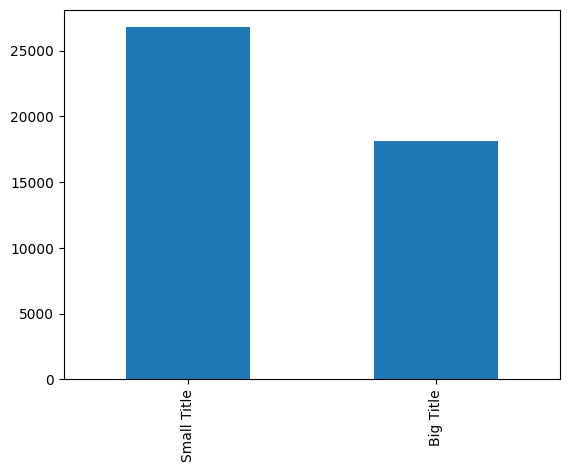

In [16]:
sizes.plot(kind = 'bar')

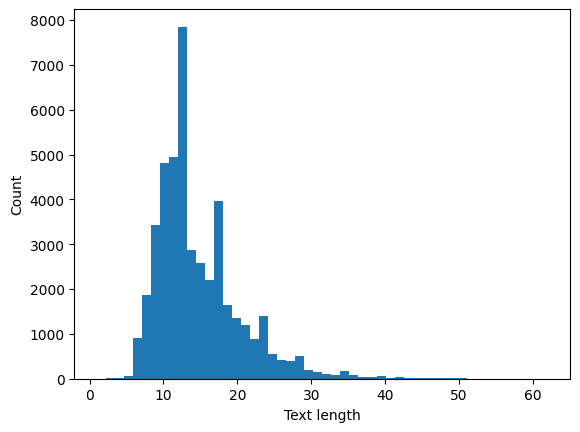

In [17]:
plt.hist(df['length'], bins=50)
plt.xlabel('Text length')
plt.ylabel('Count')
plt.show()

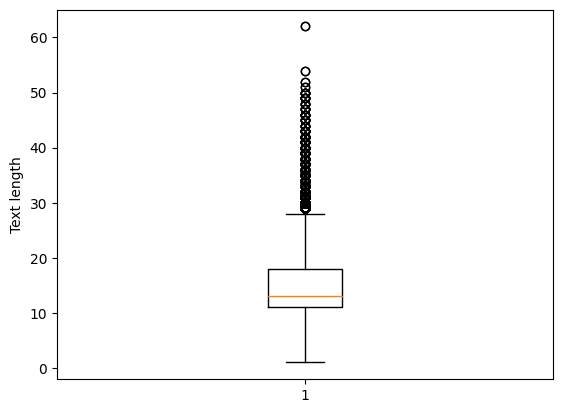

In [18]:
plt.boxplot(df['length'])
plt.ylabel('Text length')
plt.show()

# Stratified Sampling

In [19]:
lengths = df['length']
samples_per_bin = 1000
bins = {}

for i,length in enumerate(lengths):
    if length not in bins:
        bins[length] = []
    bins[length].append(i)
    
if (bins == {}):
    print("Bins dictionary is empty")
else:
    print("Bins dictionary has been created")

# sampled_texts = []
issueList = []

# Identifying whether there are issues while comparing the len(indices) with samples_per_bin
for length, indices in bins.items():
    if (len(indices)<samples_per_bin):
        issueList.append(0)
    else:
        issueList.append(1)
    # sampled_indices = random.sample(indices, samples_per_bin)
    # for index in sampled_indices:
    #     sampled_texts.append(df['title'][index])

if 1 in issueList:
    print("\nIssue(s) found")
else:
    print("\nNo issues")

Bins dictionary has been created

Issue(s) found


In [20]:
key = None
valList = []

for i,j in bins.items():
    key = i
    valList = j
    print(f"This is the key: {key}")
    print(f"This is the value: {valList}")
    break

This is the key: 19
This is the value: [0, 103, 114, 154, 155, 165, 255, 281, 398, 417, 419, 462, 474, 504, 507, 510, 537, 547, 580, 588, 610, 651, 662, 672, 678, 722, 782, 820, 839, 840, 857, 923, 934, 946, 958, 996, 1004, 1005, 1015, 1110, 1220, 1231, 1255, 1258, 1279, 1319, 1387, 1429, 1430, 1468, 1478, 1483, 1489, 1503, 1515, 1538, 1586, 1607, 1621, 1658, 1745, 1749, 1773, 1829, 1864, 1870, 1878, 1890, 1899, 1982, 2032, 2042, 2143, 2164, 2198, 2239, 2267, 2287, 2288, 2316, 2330, 2357, 2368, 2384, 2464, 2527, 2577, 2623, 2629, 2689, 2696, 2755, 2827, 2842, 2848, 2879, 2880, 2927, 2944, 2965, 2984, 3020, 3046, 3049, 3210, 3240, 3260, 3293, 3296, 3305, 3331, 3334, 3356, 3366, 3384, 3409, 3448, 3475, 3495, 3515, 3519, 3523, 3608, 3726, 3770, 3776, 3785, 3912, 3932, 4005, 4049, 4077, 4099, 4102, 4122, 4219, 4229, 4238, 4254, 4320, 4390, 4395, 4443, 4456, 4577, 4581, 4613, 4708, 4711, 4731, 4768, 4793, 4860, 4868, 4911, 4982, 4991, 5031, 5066, 5077, 5134, 5147, 5158, 5200, 5243, 5250, 52

In [21]:
sampleList = random.sample(valList, samples_per_bin)
len(sampleList)

1000

In [22]:
lenList = []

for i,j in bins.items():
    lenList.append((len(j)))

len(lenList)

54

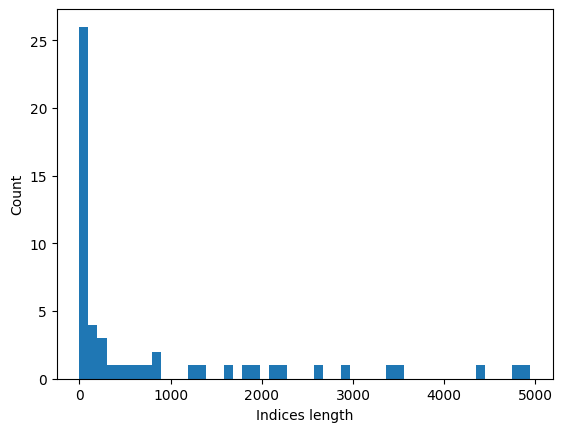

In [23]:
plt.hist(lenList, bins=50)
plt.xlabel('Indices length')
plt.ylabel('Count')
plt.show()

As we can see that there are many differences in the length of indices, we prefer to use random.choices() instead of random.sample() when the samples_per_bin is greater than the length of indices.

In [24]:
sampled_texts = []
# samples_per_bin = 1000

for length, indices in bins.items():
    if len(indices) >= samples_per_bin:
        sampled_indices = random.sample(indices, samples_per_bin)
    else:
        sampled_indices = random.choices(indices, k=samples_per_bin)
    for i in sampled_indices:
        sampled_texts.append(df['title'][i])

In [25]:
test = sampled_texts[0]
print(test)
for i in df['title']:
    if test == i:
        print(True)
        print(i)


 Bannon Takes His ‘Weapons’ At Breitbart; Smears ‘Quran Kissing’ McMaster In Scathing Hit Piece
True
 Bannon Takes His ‘Weapons’ At Breitbart; Smears ‘Quran Kissing’ McMaster In Scathing Hit Piece


In [26]:
if test in df['title']:
    print(True)
else:
    print(False)

False


In [27]:
count = 0
for text in sampled_texts:
    for i in df['title']:
        if text == i:
            count += 1
            break

count

54000

In [28]:
mulList = []
for i in sampled_texts:
    if sampled_texts.count(i) > 1:
        if i not in mulList:
            mulList.append(i)

In [29]:
len(mulList)

3863

In [30]:
dfTitle = []
for i in df['title']:
    dfTitle.append(i)

len(dfTitle)

44898

In [31]:
sngList = []
totalMultipleList = []
for i in dfTitle:
    if dfTitle.count(i) == 1:
        sngList.append(i)
    else:
        totalMultipleList.append(i)

len(sngList)

33100

In [32]:
len(totalMultipleList)

11798

In [33]:
titles = []
for i in dfTitle:
    if i not in titles:
        titles.append(i)

In [34]:
len(titles)

38729

Now we can start using "titles" for the total titles

In [35]:
newList = []

for i in sampled_texts:
    if i in titles:
        if i not in newList:
            newList.append(i)

In [36]:
if len(newList) == len(sampled_texts):
    print("All unique values in sampled texts")
else:
    print("There are values that are not unique in sampled texts")

There are values that are not unique in sampled texts
